In [1]:
# Gain modulation RNN with oja learning on weight matrix
import numpy as np
import sys
sys.path.append("..")
from rnn_sin2 import RNN
import matplotlib.pyplot as plt
import json
import torch
import seaborn as sns

## Loading Trained Weights

In [2]:
with open('../weights/SIN2_bphebbpt_comp_32_nodes/weight_history.json') as f:
    weight_history = json.load(f)

In [3]:
weight_history.keys()

dict_keys(['trained gain', 'trained shift', 'trained weights', 'connectivity matrix', 'input weights', 'output weights', 'losses', 'gain_changes', 'shift_changes', 'init_weight', 'init_activations'])

In [4]:
gains = np.array(weight_history['trained gain'])
shifts = np.array(weight_history['trained shift'])
weight_matrix = np.array(weight_history['trained weights'])
connectivity_matrix = np.array(weight_history['connectivity matrix'])
input_weight_matrix = np.array(weight_history['input weights'])
output_weight_matrix = np.array(weight_history['output weights'])
losses = np.array(weight_history['losses'])
gain_changes = np.array(weight_history['gain_changes'])
shift_changes = np.array(weight_history['shift_changes'])
init_weight_matrix = np.array(weight_history['init_weight'])
# weights = weight_history['weights']
init_activations = np.array(weight_history['init_activations'])

In [5]:
init_activations

array([[0.9951362 ],
       [0.99396157],
       [0.9921791 ],
       [0.98913568],
       [0.98345554],
       [0.97238916],
       [0.95159614],
       [0.9175573 ],
       [0.8766526 ],
       [0.84257036],
       [0.80576938],
       [0.75519544],
       [0.70334369],
       [0.63189274],
       [0.19616354],
       [0.07420705],
       [0.17636664],
       [0.27663738],
       [0.5929563 ],
       [0.68539113],
       [0.70079958],
       [0.699489  ],
       [0.68478107],
       [0.67075032],
       [0.75065547],
       [0.97100484],
       [0.99034023],
       [0.99423802],
       [0.99588656],
       [0.99674368],
       [0.99726236],
       [0.99758464]])

In [6]:
output_weight_matrix

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.]])

In [7]:
weight_matrix

array([[ 0.        ,  0.98177361,  0.98006314, ..., -0.89349169,
        -0.89361322, -0.89349753],
       [ 0.98096311,  0.        ,  0.97584963, ..., -0.89272422,
        -0.89310533, -0.89332867],
       [ 0.97770494,  0.97445583,  0.        , ..., -0.8895824 ,
        -0.89135474, -0.89200616],
       ...,
       [ 0.98009813,  0.97995824,  0.97766483, ...,  0.        ,
        -0.89186507, -0.89193422],
       [ 0.98075885,  0.98107493,  0.98018366, ..., -0.89235777,
         0.        , -0.89245075],
       [ 0.98096311,  0.98156965,  0.98133987, ..., -0.89272422,
        -0.89274019,  0.        ]])

Text(0.5, 1.0, 'Weight matrix')

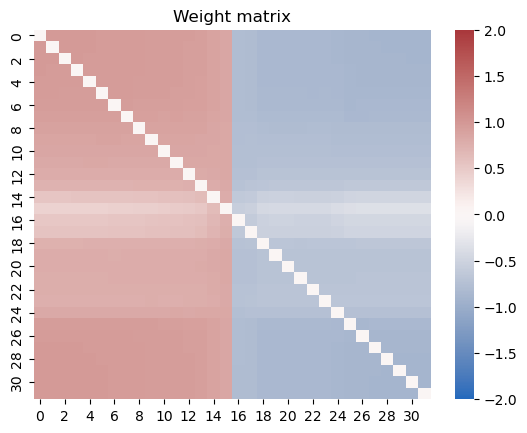

In [8]:
sns.heatmap(weight_matrix, vmax=2, vmin=-2, cmap='vlag')
plt.title('Weight matrix')
# plt.savefig('fig/0122_SIN2_bphebbpt_weight_matrix.png')

## Defining Network

In [9]:
time_constant = 100 #ms
timestep = 10 #ms
ndata = 800
time = ndata * timestep #ms
num_inputs = 1
num_nodes = 32
# init_activations = np.zeros((num_nodes, 1))

  0%|          | 0/800 [00:00<?, ?it/s]

100%|██████████| 800/800 [00:00<00:00, 18695.88it/s]


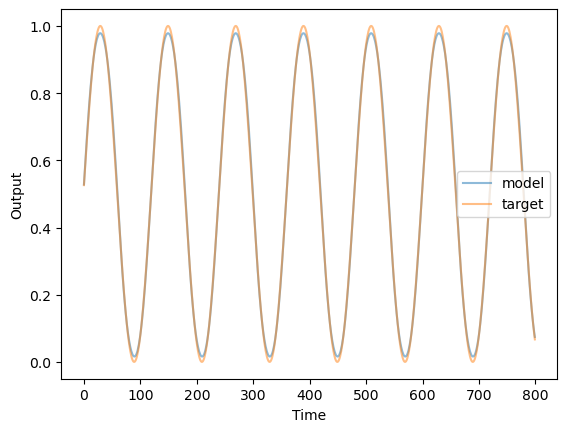

In [10]:
time_points = np.arange(ndata).reshape(-1, 1)
inputs = (1 + np.sin(time_points/60*np.pi))/2
targets = (1 + np.sin((time_points+1)/60*np.pi))/2
inputs = inputs.reshape(-1, 1)
targets = targets.reshape(-1, 1)

network = RNN(weight_matrix, connectivity_matrix, init_activations, gains, shifts, input_weight_matrix, output_weight_matrix, 
                time_constant = time_constant, timestep = timestep)
outputs, activations = network.simulate(time, torch.tensor(inputs).float())

fig, ax = plt.subplots()
plt.plot(time_points, outputs.detach().numpy(), alpha=0.5, label='model')
plt.plot(time_points, targets, alpha=0.5, label='target')
# plt.ylim([0,1])
plt.xlabel('Time')
plt.ylabel('Output')
plt.legend()
# plt.savefig("fig/0122_SIN2_bphebbpt_output.png")

100%|██████████| 800/800 [00:00<00:00, 18330.15it/s]


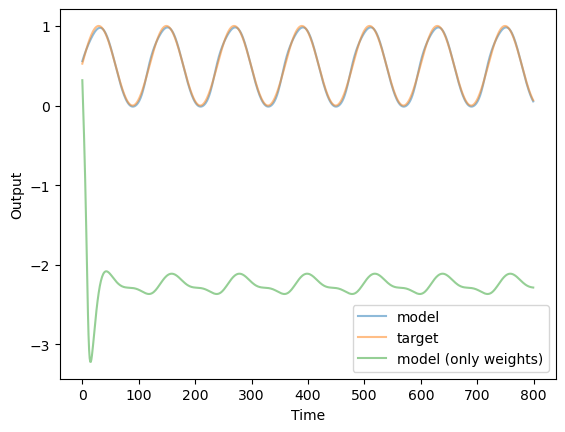

In [56]:
init_gains = np.ones((num_nodes, 1))
init_shifts = np.zeros((num_nodes, 1))
network = RNN(weight_matrix, connectivity_matrix, init_activations, init_gains, init_shifts, input_weight_matrix, output_weight_matrix, 
                time_constant = time_constant, timestep = timestep)
outputs_wt, activations_wt = network.simulate(time, torch.tensor(inputs).float())

fig, ax = plt.subplots()
plt.plot(time_points, outputs.detach().numpy(), alpha=0.5, label='model')
plt.plot(time_points, targets, alpha=0.5, label='target')
plt.plot(time_points, outputs_wt.detach().numpy(), alpha=0.5, label='model (only weights)')
plt.xlabel('Time')
plt.ylabel('Output')
plt.legend()
# plt.savefig("fig/0122_SIN2_bphebbpt_output.png")

Text(50.722222222222214, 0.5, 'Node')

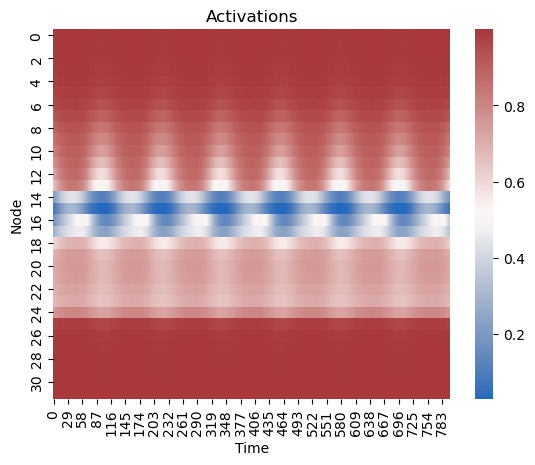

In [11]:
activations_t = activations.detach().numpy().T
sns.heatmap(activations_t, cmap='vlag')
plt.title('Activations')
plt.xlabel('Time')
plt.ylabel('Node')
# plt.savefig('fig/0122_SIN2_bphebbpt_activations.png')

Text(0.5, 1.0, 'Training Loss over Epochs')

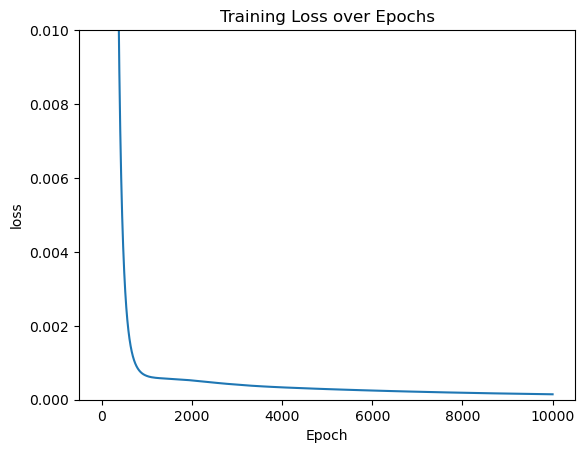

In [12]:
plt.plot(np.arange(len(losses)), losses)
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.ylim([0,0.01])
plt.title("Training Loss over Epochs")
# plt.savefig("fig/0122_SIN2_bphebbpt_loss.png")

Text(0.5, 1.0, 'Gain Changes over Epochs')

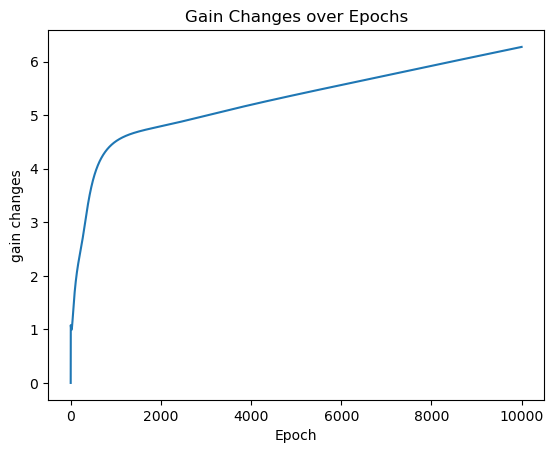

In [13]:
plt.plot(np.arange(len(gain_changes)), gain_changes)
plt.xlabel("Epoch")
plt.ylabel("gain changes")
# plt.ylim([0,0.5])
plt.title("Gain Changes over Epochs")
# plt.savefig("fig/0122_SIN2_bphebbpt_gc.png")

Text(0.5, 1.0, 'Shift Changes over Epochs')

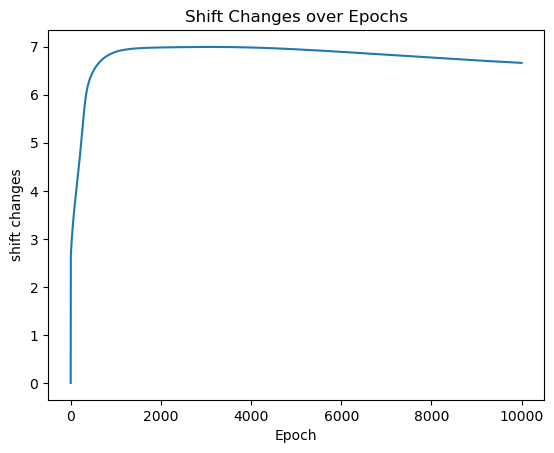

In [14]:
plt.plot(np.arange(len(shift_changes)), shift_changes)
plt.xlabel("Epoch")
plt.ylabel("shift changes")
# plt.ylim([0,0.5])
plt.title("Shift Changes over Epochs")
# plt.savefig("fig/0122_SIN2_bphebbpt_sc.png")